In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('data/aggregated_df.csv')
df.columns

Index(['match_id', 'inning', 'bowling_team', 'batter', 'batter_total_balls',
       'batter_SR', 'batter_score', 'dismissal_kind', 'date', 'match_type',
       'venue', 'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4'],
      dtype='object')

In [19]:
df.drop(columns=['batter_total_balls', "batter_SR", "dismissal_kind", "match_id", "date"], inplace=True)

In [20]:
df = df.reindex(columns=[col for col in df.columns if col != 'batter_score'] + ['batter_score'])
df.columns

Index(['inning', 'bowling_team', 'batter', 'match_type', 'venue',
       'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4',
       'batter_score'],
      dtype='object')

In [21]:
def MLR(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Overperformance?')
    plt.show()

In [22]:
def DT(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import r2_score
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train,y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Overperformance?')
    plt.show()

In [23]:
def RF(X_train, y_train, X_test, y_test):    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))
    
    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Overperformance?')
    plt.show()

In [24]:
def SVR(X_train, y_train, X_test, y_test):    
    from sklearn.svm import SVR
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Overperformance?')
    plt.show()

In [25]:
player = 'V Kohli'
gdf = df[df['batter'] == player]
gdf.drop(columns=['batter'], inplace=True)

gdf = gdf.fillna(-1).astype({"no_of_left_arm_offspinners_faced": 'int', "score_last_5": 'int', "balls_last_5": 'int', "score_last_1": 'int', "balls_last_1": 'int', "score_last_2": 'int', "balls_last_2": 'int', "score_last_3": 'int', "balls_last_3": 'int', "score_last_4": 'int', "balls_last_4": 'int'})

#print(gdf.dtypes)

C:\Users\Pranav Koka\AppData\Local\Temp\ipykernel_23440\3016620652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.drop(columns=['batter'], inplace=True)


In [26]:
X = gdf.iloc[:, :-1].values
y = gdf.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
ct1 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-18])], remainder = 'passthrough')
ct2 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-17])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X = np.array(ct1.fit_transform(X))
X = np.array(ct2.fit_transform(X))

In [27]:
y = y.reshape(len(y), 1)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[:, X_train.shape[1] - 17:] = sc_X.fit_transform(X_train[:, X_train.shape[1] - 17:])
X_test[:, X_train.shape[1] - 17:] = sc_X.transform(X_test[:, X_train.shape[1] - 17:])
y_train = sc_y.fit_transform(y_train)

In [30]:
y_train = y_train.ravel()
y_test = y_test.ravel()

[[ 1.58e+01  2.10e+01]
 [ 2.46e+01  2.10e+01]
 [ 2.50e+01  9.00e+00]
 [ 2.98e+01  3.30e+01]
 [ 5.53e+01  1.00e+01]
 [ 1.25e+02  0.00e+00]
 [ 4.18e+01  3.00e+01]
 [ 9.84e+00  2.50e+01]
 [-8.55e+00  4.00e+00]
 [ 9.89e+11  6.00e+00]
 [ 1.28e+01  5.50e+01]
 [-1.82e+14  2.00e+01]
 [ 3.86e+01  8.20e+01]
 [ 5.51e+01  7.50e+01]
 [-4.22e+00  1.60e+01]
 [ 1.04e+01  2.10e+01]
 [ 6.34e+01  5.10e+01]
 [-2.71e+12  5.90e+01]
 [ 1.90e+01  1.90e+01]
 [ 2.65e+01  9.00e+00]
 [ 8.34e+01  4.80e+01]
 [ 5.40e+01  6.70e+01]
 [ 2.99e+01  1.80e+01]
 [ 6.42e+01  2.70e+01]
 [ 4.41e+01  8.40e+01]
 [ 3.80e+01  4.10e+01]
 [ 2.55e+14  9.00e+00]
 [ 1.29e+01  1.10e+01]
 [ 5.66e+01  9.00e+01]
 [-1.25e+01  0.00e+00]
 [ 2.69e+01  3.00e+00]
 [ 2.44e+01  7.00e+00]
 [ 7.18e+01  1.70e+01]
 [ 3.43e+01  5.10e+01]
 [-1.84e+00  9.00e+00]
 [ 1.69e+01  1.00e+00]
 [ 1.29e+01  0.00e+00]
 [ 4.80e+01  1.60e+01]
 [ 2.33e+01  2.00e+00]
 [ 1.41e+01  6.00e+00]
 [-6.88e+00  0.00e+00]
 [-7.34e-02  1.20e+01]
 [ 9.84e+00  1.30e+01]
 [ 3.35e+01

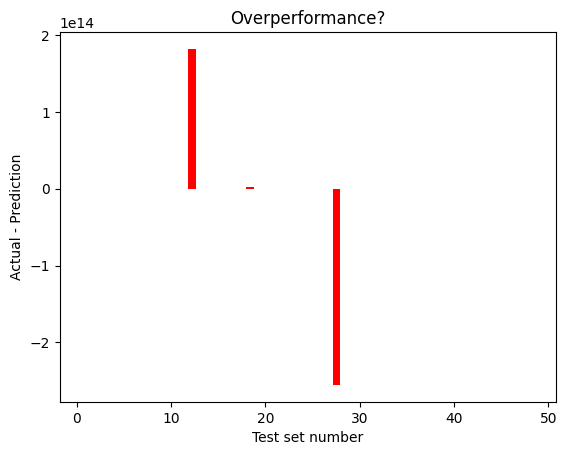

In [31]:
MLR(X_train, y_train, X_test, y_test)

[[ 22.  21.]
 [  8.  21.]
 [  1.   9.]
 [ 25.  33.]
 [  4.  10.]
 [ 18.   0.]
 [ 72.  30.]
 [  3.  25.]
 [ 23.   4.]
 [ 16.   6.]
 [ 80.  55.]
 [100.  20.]
 [ 58.  82.]
 [ 41.  75.]
 [  0.  16.]
 [ 20.  21.]
 [ 73.  51.]
 [ 72.  59.]
 [  8.  19.]
 [ 24.   9.]
 [100.  48.]
 [ 62.  67.]
 [ 23.  18.]
 [ 35.  27.]
 [ 51.  84.]
 [ 58.  41.]
 [ 24.   9.]
 [ 24.  11.]
 [ 79.  90.]
 [  8.   0.]
 [  5.   3.]
 [  8.   7.]
 [ 18.  17.]
 [ 58.  51.]
 [ 10.   9.]
 [ 11.   1.]
 [  8.   0.]
 [ 27.  16.]
 [  0.   2.]
 [  4.   6.]
 [  0.   0.]
 [ 18.  12.]
 [  4.  13.]
 [ 73.  70.]
 [  4.  12.]
 [ 79.  67.]
 [ 33.  21.]]
r2_score is 0.3879336722442902


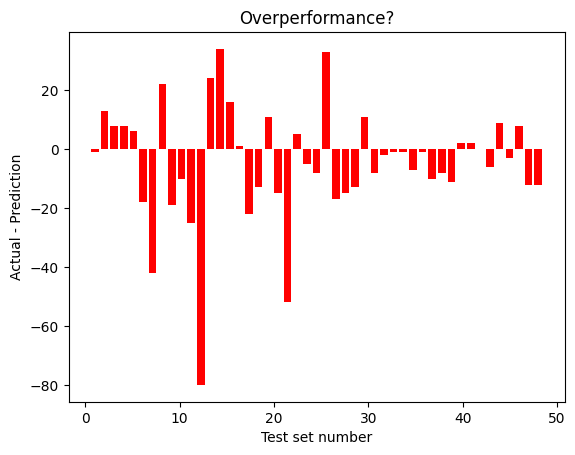

In [32]:
DT(X_train, y_train, X_test, y_test)

[[17.1 21. ]
 [10.7 21. ]
 [ 8.   9. ]
 [48.1 33. ]
 [14.7 10. ]
 [29.4  0. ]
 [61.8 30. ]
 [12.4 25. ]
 [10.5  4. ]
 [ 3.2  6. ]
 [66.9 55. ]
 [79.6 20. ]
 [47.4 82. ]
 [43.1 75. ]
 [ 4.6 16. ]
 [11.7 21. ]
 [60.8 51. ]
 [29.6 59. ]
 [ 8.6 19. ]
 [36.4  9. ]
 [80.4 48. ]
 [53.6 67. ]
 [18.2 18. ]
 [25.5 27. ]
 [38.5 84. ]
 [64.2 41. ]
 [ 8.8  9. ]
 [21.5 11. ]
 [62.4 90. ]
 [14.5  0. ]
 [ 7.1  3. ]
 [14.2  7. ]
 [37.1 17. ]
 [47.4 51. ]
 [ 6.   9. ]
 [13.1  1. ]
 [ 9.7  0. ]
 [31.1 16. ]
 [ 4.8  2. ]
 [27.6  6. ]
 [ 3.7  0. ]
 [12.5 12. ]
 [17.3 13. ]
 [68.  70. ]
 [31.8 12. ]
 [38.3 67. ]
 [47.  21. ]]
r2_score is 0.39737326856978195


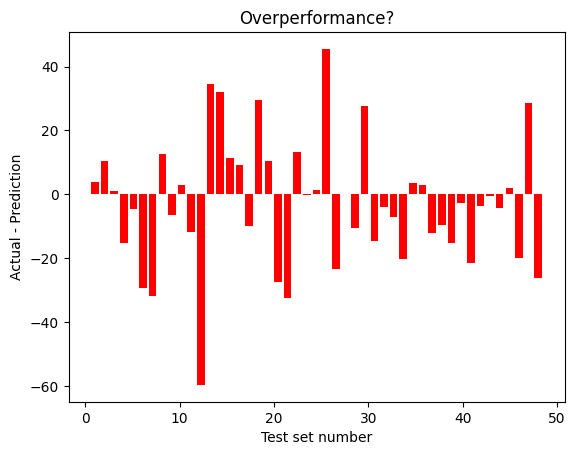

In [33]:
RF(X_train, y_train, X_test, y_test)

[[26.83 21.  ]
 [26.43 21.  ]
 [13.57  9.  ]
 [27.99 33.  ]
 [17.42 10.  ]
 [33.56  0.  ]
 [42.99 30.  ]
 [16.75 25.  ]
 [-2.1   4.  ]
 [12.84  6.  ]
 [46.08 55.  ]
 [43.97 20.  ]
 [44.28 82.  ]
 [41.8  75.  ]
 [12.35 16.  ]
 [19.89 21.  ]
 [51.18 51.  ]
 [37.21 59.  ]
 [20.49 19.  ]
 [20.45  9.  ]
 [47.66 48.  ]
 [62.24 67.  ]
 [13.05 18.  ]
 [30.89 27.  ]
 [43.   84.  ]
 [53.74 41.  ]
 [ 8.87  9.  ]
 [23.43 11.  ]
 [54.2  90.  ]
 [16.1   0.  ]
 [16.31  3.  ]
 [25.23  7.  ]
 [34.97 17.  ]
 [35.3  51.  ]
 [ 9.83  9.  ]
 [ 7.53  1.  ]
 [10.64  0.  ]
 [28.93 16.  ]
 [ 6.15  2.  ]
 [21.66  6.  ]
 [ 2.59  0.  ]
 [ 6.23 12.  ]
 [21.67 13.  ]
 [47.14 70.  ]
 [20.49 12.  ]
 [40.05 67.  ]
 [34.45 21.  ]]
r2_score is 0.6035188050679318


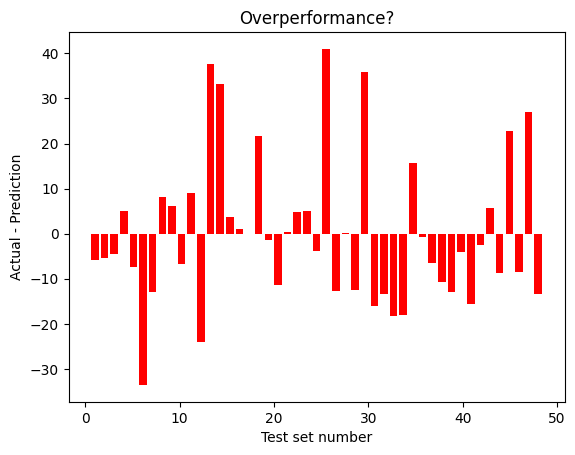

In [34]:
SVR(X_train, y_train, X_test, y_test)
